# Thousand Monkeys (Simulations experiments)

In this project, we are delving into the realm of modeling and simulation using Python. Our endeavor centers around the intriguing concept of the 'Infinite Monkey Theorem.' This theorem posits that given an infinite number of monkeys equipped with typewriters and an infinite amount of time, they would eventually produce all possible literary works, including those of Shakespeare, purely by chance.

Our objective is to simulate this phenomenon through the lens of modeling and simulation using Python. By harnessing the power of randomness and algorithms, we will endeavor to mimic the hypothetical scenario where monkeys randomly generate text. Through iterations and comparisons, we will gauge the similarity of their output with a target text. While a simplistic approach, this simulation will serve as a fascinating exploration of probabilistic and computational concepts, offering us insights into the intricacies of chance, randomness, and the infinite


For implementing this we only will be using the following libraries


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

We used a object oriented programming approach to implement the algorithm as you can see we created the Dna class and a Population class both represent the two most important concepts in the algorithm.

The implementation will be done as follows:

![classes](class.png)


In [99]:
class Dna:
    """
    Represents a DNA sequence with mutation and crossover operations for a genetic algorithm.

    Attributes:
        target (str): The target DNA sequence to match.
        mutation_rate (float): The probability of mutation for each gene in the sequence.
        genes (list): List of characters representing the DNA sequence.
        fitness (float): Fitness score of the DNA sequence based on how closely it matches the target.
    """

    def __init__(self, target, mutation_rate=0.01):
        """
        Initializes a DNA instance.

        Args:
            target (str): The target DNA sequence to match.
            mutation_rate (float, optional): The probability of mutation for each gene. Defaults to 0.01.
        """
        self.target = target
        self.genes = []
        self.fitness = 0
        self.mutation_rate = mutation_rate

        # Initialize genes randomly within the ASCII range of printable characters
        for _ in range(len(target)):
            self.genes.append(chr(np.random.randint(32, 126)))

    def calc_fitness(self):
        """
        Calculates the fitness of the DNA sequence based on how closely it matches the target.
        Updates the fitness attribute.
        """
        score = 0
        for i in range(len(self.target)):
            if self.genes[i] == self.target[i]:
                score += 1
        self.fitness = score / len(self.target)

    def crossover(self, partner):
        """
        Performs crossover with another DNA sequence to create a new child DNA sequence.

        Args:
            partner (Dna): The partner DNA sequence for crossover.

        Returns:
            Dna: A new child DNA sequence resulting from crossover.
        """
        child = Dna(
            target=self.target,
            mutation_rate=self.mutation_rate  # Pass mutation rate to child DNA
        )
        midpoint = np.random.randint(0, len(self.genes))
        for i in range(len(self.genes)):
            if i < midpoint:
                child.genes[i] = self.genes[i]
            else:
                child.genes[i] = partner.genes[i]
        return child

    def mutate(self):
        """
        Applies mutations to the DNA sequence based on the mutation rate.
        """
        for i in range(len(self.genes)):
            if np.random.rand() < self.mutation_rate:
                self.genes[i] = chr(np.random.randint(32, 126))

    def get_phrase(self):
        """
        Returns the DNA sequence as a string.

        Returns:
            str: The DNA sequence.
        """
        return ''.join(self.genes)

In [100]:
class Population:
    """
    Represents a population of DNA sequences for a genetic algorithm.

    Attributes:
        target (str): The target DNA sequence that the population aims to evolve towards.
        mutation_rate (float): The probability of mutation for each gene in the DNA sequences.
        population_size (int): The number of DNA sequences in the population.
        population (list): List of Dna instances representing the population.
        mating_pool (list): List of selected DNA sequences for mating.
        generations (int): Number of generations the population has evolved through.
        finished (bool): Indicates if the evolution has reached the perfect score.
        perfect_score (float): The perfect fitness score (1.0).
    """

    def __init__(self, target, mutation_rate, population_size):
        """
        Initializes a Population instance.

        Args:
            target (str): The target DNA sequence to evolve towards.
            mutation_rate (float): The probability of mutation for each gene.
            population_size (int): The size of the population.
        """
        self.target = target
        self.mutation_rate = mutation_rate
        self.population_size = population_size
        self.population = []
        self.mating_pool = []
        self.generations = 0
        self.finished = False
        self.perfect_score = 1

        # Initialize the population with random DNA sequences
        for _ in range(population_size):
            self.population.append(Dna(target, mutation_rate))

        self.calc_fitness()

    def calc_fitness(self):
        """
        Calculates the fitness of each DNA sequence in the population.
        """
        for i in range(self.population_size):
            self.population[i].calc_fitness()

    def natural_selection(self):
        """
        Creates a mating pool based on the fitness of the DNA sequences.
        """
        self.mating_pool = []

        # Create the mating pool based on fitness
        for i in range(self.population_size):
            n = int(self.population[i].fitness * 100)
            self.mating_pool.extend([self.population[i]] * n)

    def generate(self):
        """
        Generates a new population through crossover and mutation.
        """
        new_population = []
        for _ in range(self.population_size):
            a = np.random.randint(0, len(self.mating_pool) - 1)
            b = np.random.randint(0, len(self.mating_pool) - 1)
            partner_a = self.mating_pool[a]
            partner_b = self.mating_pool[b]
            child = partner_a.crossover(partner_b)
            child.mutate()
            new_population.append(child)

        self.population = new_population
        self.generations += 1

    def get_best(self):
        """
        Returns the DNA sequence with the highest fitness in the population.

        Returns:
            str: The DNA sequence with the highest fitness.
        """
        world_record = 0
        index = 0
        for i in range(self.population_size):
            if self.population[i].fitness > world_record:
                index = i
                world_record = self.population[i].fitness

        if world_record == self.perfect_score:
            self.finished = True
        return self.population[index].get_phrase()

    def evaluate(self):
        """
        Evaluates the fitness of each DNA sequence in the population.
        """
        world_record = 0
        index = 0
        for i in range(self.population_size):
            if self.population[i].fitness > world_record:
                index = i
                world_record = self.population[i].fitness

        if world_record == self.perfect_score:
            self.finished = True

    def is_finished(self):
        """
        Checks if the evolution has reached its termination condition.

        Returns:
            bool: True if evolution is finished, False otherwise.
        """
        return self.finished

    def get_average_fitness(self):
        """
        Calculates and returns the average fitness of the population.

        Returns:
            float: The average fitness of the population.
        """
        total = 0
        for i in range(self.population_size):
            total += self.population[i].fitness
        return total / self.population_size

    def show_population(self):
        """
        Prints the DNA sequences in the population.
        """
        for i in range(self.population_size):
            print(self.population[i].get_phrase())

In order to see the experiment we made a "usual experiment" which is the normal way we can see the algorithm.


In [101]:
def usual_experiment(target, mutation_rate, population_size):
    """
    Perform a usual genetic algorithm experiment.

    Args:
        target (str): The target DNA sequence to evolve towards.
        mutation_rate (float): The probability of mutation for each gene.
        population_size (int): The size of the population.

    Returns:
        int: The number of generations taken to reach the target.
    """
    # Initialize a population with the given parameters
    population = Population(target, mutation_rate, population_size)

    # Run the genetic algorithm until the termination condition is met
    while not population.is_finished():
        population.natural_selection()
        population.generate()
        population.calc_fitness()
        population.evaluate()

        # Print progress information at intervals
        if population.generations % 200 == 0:
            print('Generation:', population.generations)
            print('Average fitness:', population.get_average_fitness())
            print('Best phrase:', population.get_best())
            print('')

    # Print final results
    print('Finished!')
    print('Generation:', population.generations)
    print('Average fitness:', population.get_average_fitness())
    print('Best phrase:', population.get_best())
    print('')

    # Return the number of generations taken to reach the target
    return population.generations

We implemented a 'usual experiment' function to demonstrate its functionality.


In [102]:
target = 'Washington Yandun Morales'
mutation_rate = 0.01
population_size = 200

# usual_experiment(target, mutation_rate, population_size)

### **Simulations**

Once we've implemented the "Infinite Monkey Theorem" algorithm using the genetic algorithm approach, there are several interesting areas we could explore through simulations. Here are some ideas:

-   **Impact of Mutation Rate**

Experiment with different mutation rates and observe how they affect convergence and the quality of solutions found. Is there an optimal balance between exploration and exploitation? How does the algorithm's dynamics change with high or low mutation rates?

-   **Population Size**

Modify the population size and observe how it affects the convergence speed and solution quality. Are larger populations needed to find optimal solutions? How do the results change with smaller populations?

-   **Impact of Target Length**

Vary the length of the target phrase and observe how it affects algorithm performance. Do solutions become harder or easier to find as the target length increases?

-   **Alternative Selection Strategies**

Experiment with different selection strategies in the reproduction process. How does parent selection affect convergence speed and quality?

-   **Comparison with Alternative Algorithms**

Compare the genetic algorithm with other search and optimization methods, such as random search or brute-force search. How does it compare in terms of convergence time and solution quality?

These are just a few of the many possibilities we will be exploring through simulations of this algorithm.


### **Impact of mutatio rate**

We are going to run some simulations to see how the mutation rate affect on the convergence of each expriment.


In [103]:
def run_simulation(target, mutation_rate, population_size, num_simulations):
    success_rates = []
    avg_generations_list = []

    for _ in range(num_simulations):
        population = Population(target, mutation_rate, population_size)
        max_generations = 1000  # Set the maximum number of generations

        while not population.is_finished() and population.generations < max_generations:
            population.natural_selection()
            population.generate()
            population.calc_fitness()
            population.evaluate()

        if population.is_finished():
            success_rates.append(1)
            avg_generations_list.append(population.generations)
        else:
            success_rates.append(0)
            avg_generations_list.append(max_generations)

    success_rate = sum(success_rates) / num_simulations
    avg_generations = sum(avg_generations_list) / num_simulations

    return success_rate, avg_generations

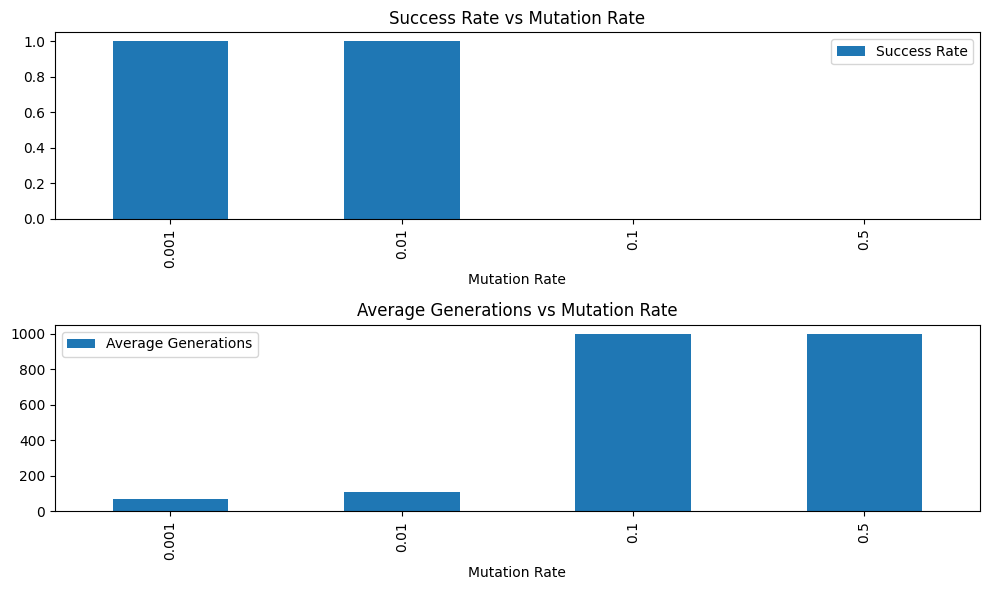

In [104]:
target = 'Washington Yandun Morales'
population_size = 1000
num_simulations = 10

mutation_rates = [0.001, 0.01, 0.1, 0.5]
results = []

for mutation_rate in mutation_rates:
    success_rate, avg_generations = run_simulation(
        target, mutation_rate, population_size, num_simulations)
    results.append((mutation_rate, success_rate, avg_generations))

# Create a pandas DataFrame
df = pd.DataFrame(results, columns=[
                  'Mutation Rate', 'Success Rate', 'Average Generations'])

# Modify success rates for simulations that reached max generations
df['Success Rate'] = df.apply(
    lambda row: row['Success Rate'] if row['Average Generations'] < 5000 else 0, axis=1)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
df.plot(x='Mutation Rate', y='Success Rate', kind='bar', ax=plt.gca())
plt.title('Success Rate vs Mutation Rate')

plt.subplot(2, 1, 2)
df.plot(x='Mutation Rate', y='Average Generations', kind='bar', ax=plt.gca())
plt.title('Average Generations vs Mutation Rate')

plt.tight_layout()
plt.show()